___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

Data vocabulary:

1. #3 (age): age in years 
2. #4 (sex): sex (1 = male; 0 = female) 
3. #9 (cp): cp: chest pain type | Value 0: typical angina | Value 1: atypical angina | Value 2: non-anginal pain | Value 3: asymptomatic 
4. #10 (trestbps): resting blood pressure (in mm Hg on admission to the hospital) 
5. #12 (chol): serum cholestoral in mg/dl 
6. #16 (fbs): (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
7. #19 (restecg): resting electrocardiographic results | Value 0: normal | Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) | Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
8. #32 (thalach): maximum heart rate achieved 
9. #38 (exang): exercise induced angina (1 = yes; 0 = no) 
10. #40 (oldpeak): ST depression induced by exercise relative to rest 
11. #41 (slope): the slope of the peak exercise ST segment | Value 1: upsloping | Value 2: flat | Value 3: downsloping 
12. #44 (ca): number of major vessels (0-3) colored by flourosopy 
13. #51 (thal): 3 = normal; 6 = fixed defect; 7 = reversable defect 
14. #58 (num) (the predicted attribute): Value 0: < 50% diameter narrowing | Value 1: > 50% diameter narrowing 

# Import esential Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, cross_val_score

#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Ingest the data to notebook

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.300,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.500,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.400,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.800,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.600,2,0,2,1


In [4]:
df.shape

(303, 14)

# EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000
mean,54.366,0.683,0.967,131.624,246.264,0.149,0.528,149.647,0.327,1.040,1.399,0.729,2.314,0.545
std,9.082,0.466,1.032,17.538,51.831,0.356,0.526,22.905,0.470,1.161,0.616,1.023,0.612,0.499
min,29.000,0.000,0.000,94.000,126.000,0.000,0.000,71.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,47.500,0.000,0.000,120.000,211.000,0.000,0.000,133.500,0.000,0.000,1.000,0.000,2.000,0.000
50%,55.000,1.000,1.000,130.000,240.000,0.000,1.000,153.000,0.000,0.800,1.000,0.000,2.000,1.000
75%,61.000,1.000,2.000,140.000,274.500,0.000,1.000,166.000,1.000,1.600,2.000,1.000,3.000,1.000
max,77.000,1.000,3.000,200.000,564.000,1.000,2.000,202.000,1.000,6.200,2.000,4.000,3.000,1.000


# Data Preprocessing

In [7]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

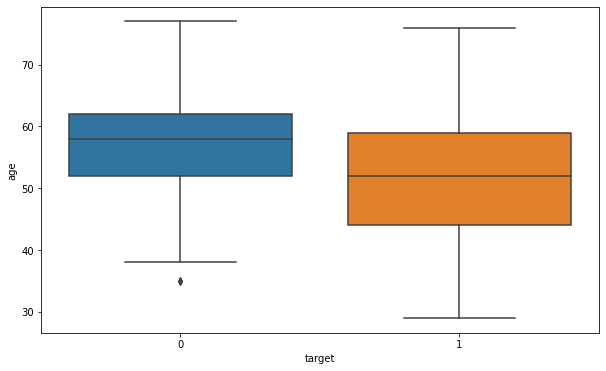

In [8]:
sns.boxplot(x='target',y='age',data=df);

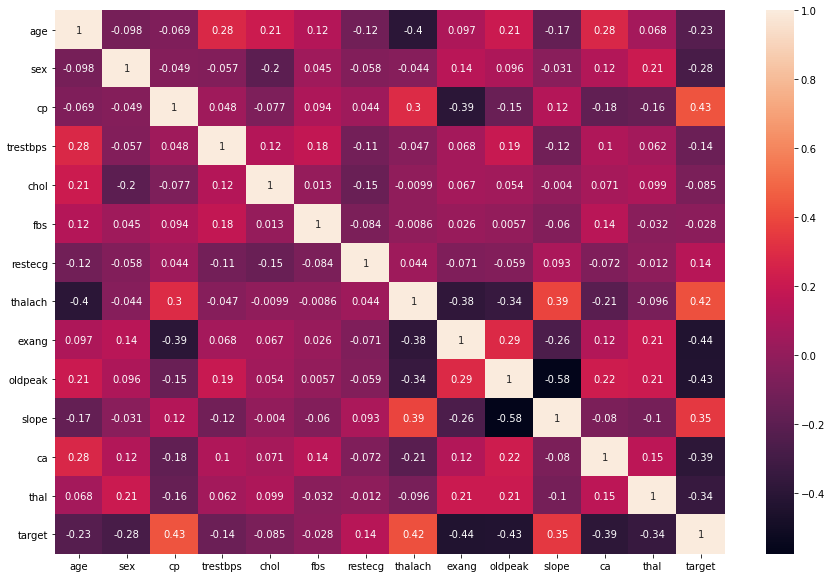

In [9]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True);


In [10]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.300,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.500,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.400,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.800,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.600,2,0,2,1


In [11]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [12]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [13]:
df.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [14]:
df.trestbps.value_counts()

120    37
130    36
140    32
110    19
150    17
138    13
128    12
125    11
160    11
112     9
132     8
118     7
108     6
135     6
124     6
152     5
145     5
134     5
100     4
122     4
170     4
126     3
115     3
105     3
136     3
180     3
142     3
146     2
148     2
178     2
94      2
144     2
102     2
129     1
192     1
101     1
174     1
172     1
104     1
165     1
164     1
106     1
156     1
155     1
154     1
114     1
117     1
123     1
200     1
Name: trestbps, dtype: int64

In [15]:
df.chol.value_counts()

204    6
197    6
234    6
269    5
212    5
      ..
215    1
210    1
200    1
195    1
417    1
Name: chol, Length: 152, dtype: int64

In [16]:
df.fbs.value_counts()

0    258
1     45
Name: fbs, dtype: int64

In [17]:
df.restecg.value_counts()

1    152
0    147
2      4
Name: restecg, dtype: int64

In [18]:
df.thalach.value_counts()

162    11
163     9
160     9
152     8
173     8
       ..
128     1
129     1
134     1
137     1
202     1
Name: thalach, Length: 91, dtype: int64

In [19]:
df.exang.value_counts()

0    204
1     99
Name: exang, dtype: int64

In [20]:
df.oldpeak.value_counts()

0.000    99
1.200    17
1.000    14
0.600    14
0.800    13
1.400    13
0.200    12
1.600    11
1.800    10
0.400     9
2.000     9
0.100     7
2.600     6
2.800     6
1.900     5
0.500     5
1.500     5
3.000     5
2.200     4
3.600     4
0.300     3
2.400     3
0.900     3
4.000     3
3.400     3
2.300     2
1.100     2
4.200     2
3.200     2
2.500     2
3.500     1
1.300     1
3.800     1
6.200     1
5.600     1
3.100     1
2.900     1
4.400     1
0.700     1
2.100     1
Name: oldpeak, dtype: int64

In [21]:
df.slope.value_counts()

2    142
1    140
0     21
Name: slope, dtype: int64

In [22]:
df.ca.value_counts()

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

In [23]:
df.thal.value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

In [24]:
df['cp']=df['cp'].replace({0:'typical angina',1:'atypical angina',2:'non-anginal pain',3:'asymptomatic'})

In [25]:
df['restecg']=df['restecg'].replace({0:'normal',1:'having ST-T wave abnormality',2:'left ventricular hypertrophy'})

In [26]:
df['slope']=df['slope'].replace({1:'upsloping',2:'flat',3:'downsloping'})

In [27]:
df['thal']=df['thal'].replace({3:'normal',6:'fixed defect',7:'reversable defect'})

In [28]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,asymptomatic,145,233,1,normal,150,0,2.300,0,0,1,1
1,37,1,non-anginal pain,130,250,0,having ST-T wave abnormality,187,0,3.500,0,0,2,1
2,41,0,atypical angina,130,204,0,normal,172,0,1.400,flat,0,2,1
3,56,1,atypical angina,120,236,0,having ST-T wave abnormality,178,0,0.800,flat,0,2,1
4,57,0,typical angina,120,354,0,having ST-T wave abnormality,163,1,0.600,flat,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,typical angina,140,241,0,having ST-T wave abnormality,123,1,0.200,upsloping,0,normal,0
299,45,1,asymptomatic,110,264,0,having ST-T wave abnormality,132,0,1.200,upsloping,0,normal,0
300,68,1,typical angina,144,193,1,having ST-T wave abnormality,141,0,3.400,upsloping,2,normal,0
301,57,1,typical angina,130,131,0,having ST-T wave abnormality,115,1,1.200,upsloping,1,normal,0


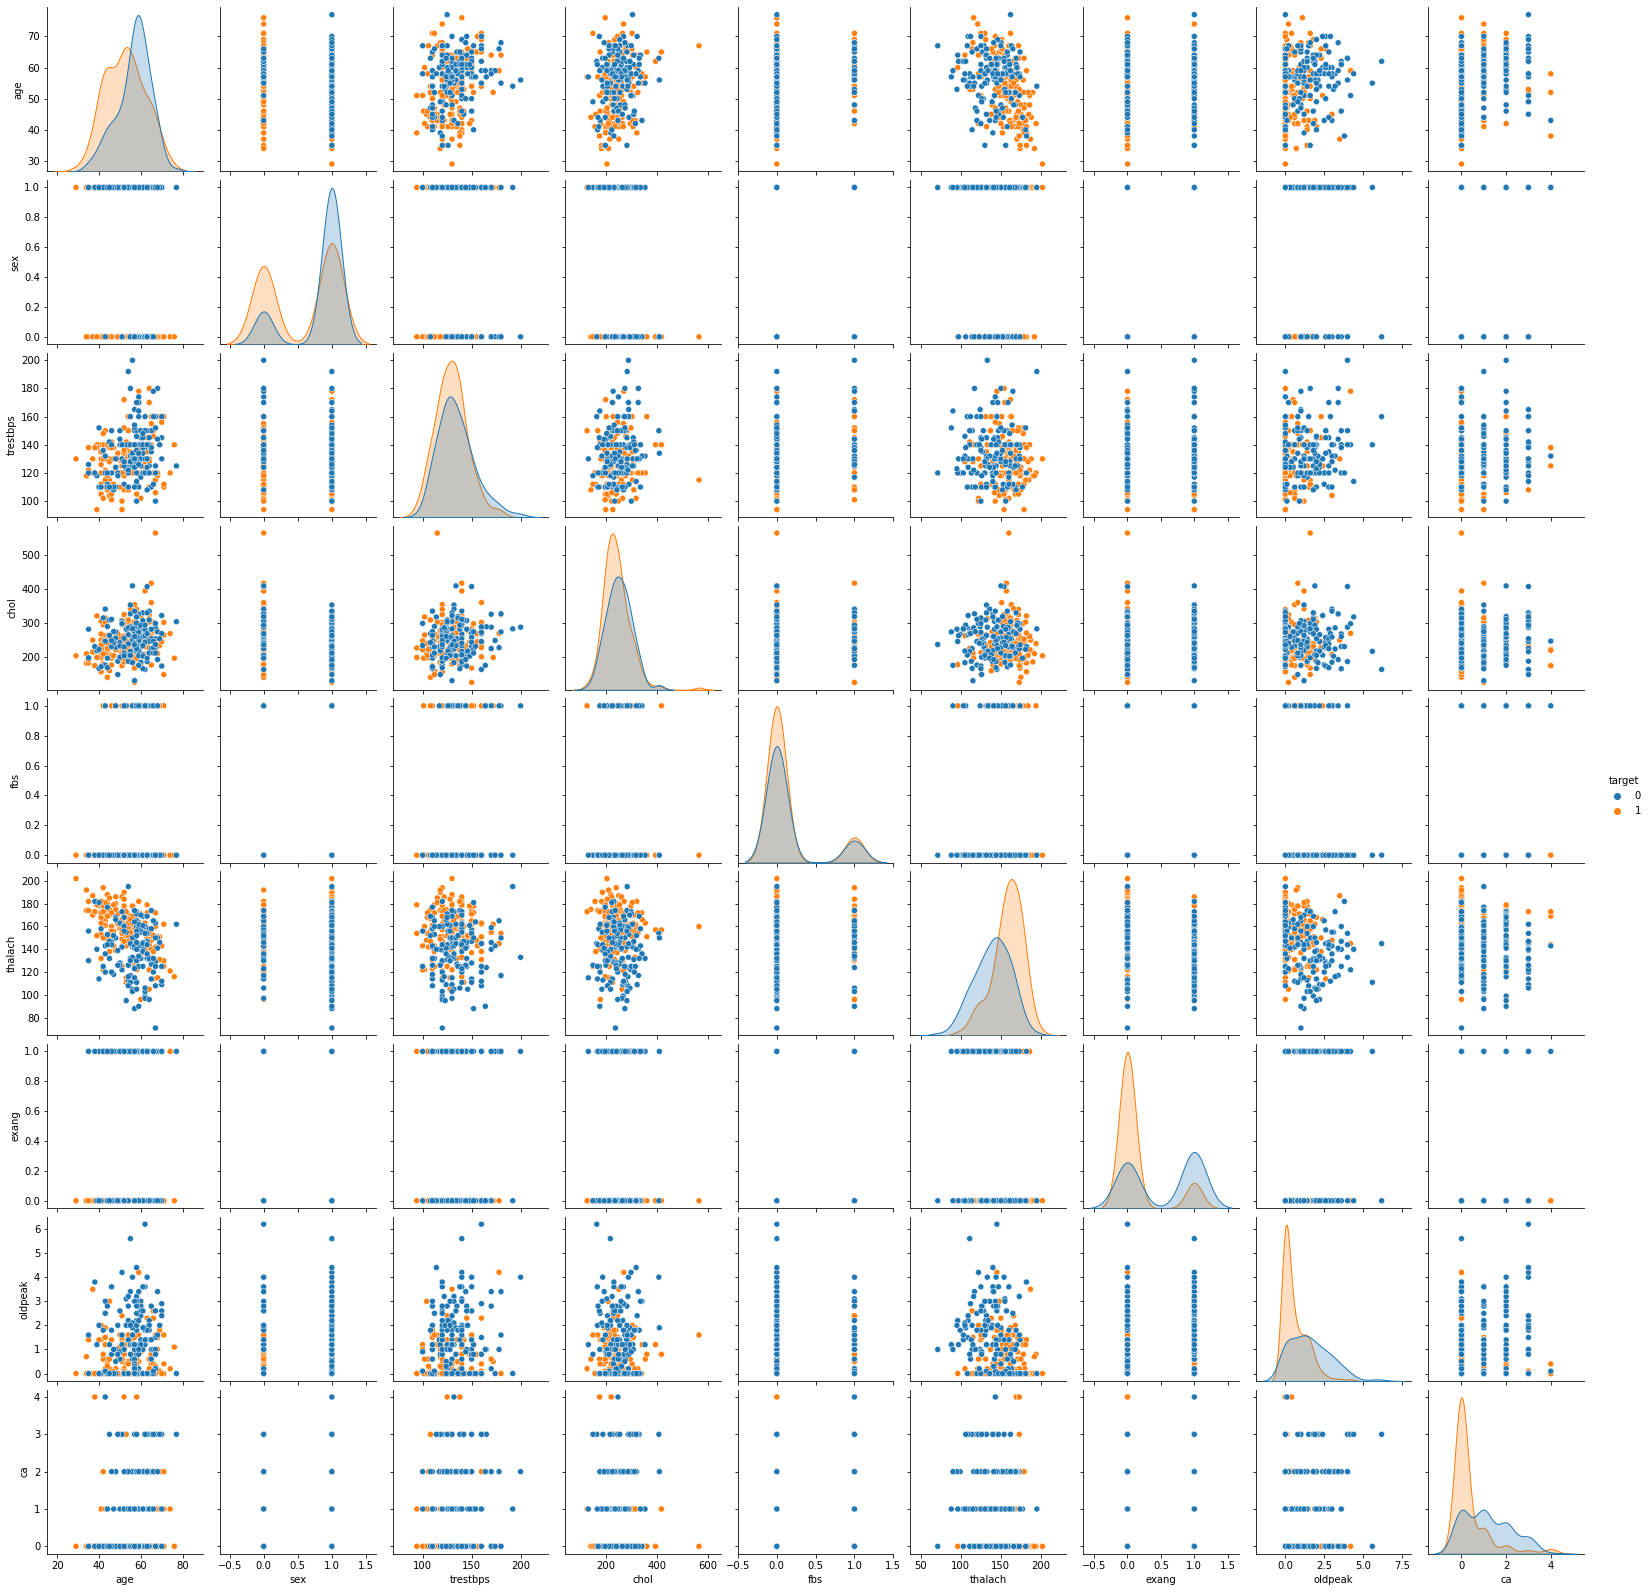

In [29]:
sns.pairplot(df.select_dtypes(include='number'), hue = "target")  # Green:1 Blue:0

In [30]:
df=pd.get_dummies(df,drop_first=True)
df

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,cp_atypical angina,cp_non-anginal pain,cp_typical angina,restecg_left ventricular hypertrophy,restecg_normal,slope_flat,slope_upsloping,thal_1,thal_2,thal_normal
0,63,1,145,233,1,150,0,2.300,0,1,0,0,0,0,1,0,0,1,0,0
1,37,1,130,250,0,187,0,3.500,0,1,0,1,0,0,0,0,0,0,1,0
2,41,0,130,204,0,172,0,1.400,0,1,1,0,0,0,1,1,0,0,1,0
3,56,1,120,236,0,178,0,0.800,0,1,1,0,0,0,0,1,0,0,1,0
4,57,0,120,354,0,163,1,0.600,0,1,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,123,1,0.200,0,0,0,0,1,0,0,0,1,0,0,1
299,45,1,110,264,0,132,0,1.200,0,0,0,0,0,0,0,0,1,0,0,1
300,68,1,144,193,1,141,0,3.400,2,0,0,0,1,0,0,0,1,0,0,1
301,57,1,130,131,0,115,1,1.200,1,0,0,0,1,0,0,0,1,0,0,1


In [31]:
X = df.drop('target', axis=1)
y = df.target

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [33]:
scaler = MinMaxScaler()

In [34]:
X_train_scaled = scaler.fit_transform(X_train)

In [35]:
X_test_scaled = scaler.transform(X_test)

# Implement Logistic Regression and Evaluate

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
log_model=LogisticRegression()

In [38]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [39]:
y_pred=log_model.predict(X_test_scaled)

In [40]:
y_pred_proba = log_model.predict_proba(X_test_scaled)

In [41]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data["pred"] = y_pred
test_data["pred_proba"] = y_pred_proba[:,1]
test_data.sample(10)

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_atypical angina,...,restecg_left ventricular hypertrophy,restecg_normal,slope_flat,slope_upsloping,thal_1,thal_2,thal_normal,target,pred,pred_proba
7,44,1,120,263,0,173,0,0.000,0,1,...,0,0,1,0,0,0,1,1,1,0.714
92,52,1,138,223,0,169,0,0.000,4,0,...,0,0,1,0,0,1,0,1,1,0.704
113,43,1,110,211,0,161,0,0.000,0,0,...,0,0,1,0,0,0,1,1,1,0.524
19,69,0,140,239,0,151,0,1.800,2,0,...,0,0,1,0,0,1,0,1,1,0.886
164,38,1,138,175,0,173,0,0.000,4,0,...,0,0,1,0,0,1,0,1,1,0.717
6,56,0,140,294,0,153,0,1.300,0,1,...,0,1,0,1,0,1,0,1,1,0.777
22,42,1,140,226,0,178,0,0.000,0,0,...,0,0,1,0,0,1,0,1,1,0.845
246,56,0,134,409,0,150,1,1.900,2,0,...,0,1,0,1,0,0,1,0,0,0.030
79,58,1,105,240,0,154,1,0.600,0,0,...,0,1,0,1,0,0,1,1,0,0.233
285,46,1,140,311,0,120,1,1.800,2,0,...,0,0,0,1,0,0,1,0,0,0.020


In [42]:
from sklearn.metrics import confusion_matrix, classification_report

In [43]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [44]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[35  6]
 [ 8 42]]
              precision    recall  f1-score   support

           0       0.81      0.85      0.83        41
           1       0.88      0.84      0.86        50

    accuracy                           0.85        91
   macro avg       0.84      0.85      0.85        91
weighted avg       0.85      0.85      0.85        91


Train_Set
[[ 80  17]
 [ 13 102]]
              precision    recall  f1-score   support

           0       0.86      0.82      0.84        97
           1       0.86      0.89      0.87       115

    accuracy                           0.86       212
   macro avg       0.86      0.86      0.86       212
weighted avg       0.86      0.86      0.86       212



In [45]:
from sklearn.model_selection import cross_validate

In [46]:
model = LogisticRegression()

In [47]:
scores = cross_validate(model, X_train_scaled, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10)

In [48]:
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores   

,fit_time,score_time,test_precision,test_recall,test_f1,test_accuracy
1,0.027,0.006,0.846,0.917,0.880,0.864
2,0.020,0.006,0.917,0.917,0.917,0.909
3,0.016,0.005,0.800,0.667,0.727,0.714
4,0.014,0.006,0.909,0.833,0.870,0.857
5,0.015,0.006,0.688,0.917,0.786,0.714
6,0.018,0.005,0.818,0.818,0.818,0.810
7,0.011,0.007,0.786,1.000,0.880,0.857
8,0.008,0.003,0.917,1.000,0.957,0.952
9,0.008,0.002,0.875,0.636,0.737,0.762
10,0.008,0.005,0.900,0.818,0.857,0.857


In [49]:
df_scores.mean()[2:]    

test_precision   0.845
test_recall      0.852
test_f1          0.843
test_accuracy    0.830
dtype: float64

In [50]:
from sklearn.model_selection import GridSearchCV

model = LogisticRegression()

penalty = ["l1", "l2"]
C = np.logspace(-1, 5, 20)
class_weight= ["balanced", None] 
# The "balanced" mode uses the values of y to automatically adjust weights inversely proportional to class frequencies 
# in the input data
solver = ["lbfgs", "liblinear", "sag", "saga"]

param_grid = {"penalty" : penalty,
              "C" : C,
              "class_weight":class_weight,
              "solver":solver}


grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=10,
                          scoring = "recall",   #f1_0 = make_scorer(f1_score, pos_label =0)
                          n_jobs = -1)

In [51]:
grid_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear', 'sag', 'saga']},
             scoring='recall')

In [52]:
grid_model.best_params_

{'C': 0.42813323987193935,
 'class_weight': None,
 'penalty': 'l1',
 'solver': 'saga'}

In [53]:
eval_metric(grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[35  6]
 [10 40]]
              precision    recall  f1-score   support

           0       0.78      0.85      0.81        41
           1       0.87      0.80      0.83        50

    accuracy                           0.82        91
   macro avg       0.82      0.83      0.82        91
weighted avg       0.83      0.82      0.82        91


Train_Set
[[ 81  16]
 [ 13 102]]
              precision    recall  f1-score   support

           0       0.86      0.84      0.85        97
           1       0.86      0.89      0.88       115

    accuracy                           0.86       212
   macro avg       0.86      0.86      0.86       212
weighted avg       0.86      0.86      0.86       212



In [54]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve

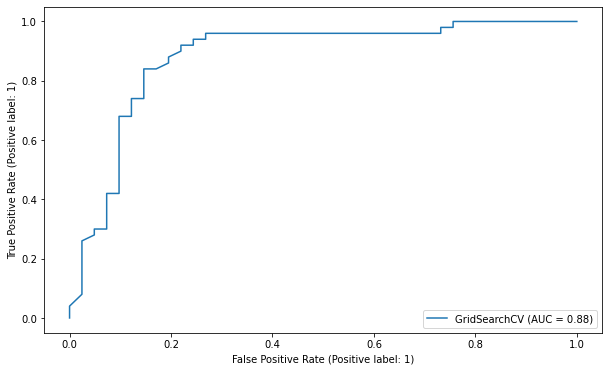

In [55]:
plot_roc_curve(grid_model, X_test_scaled, y_test);

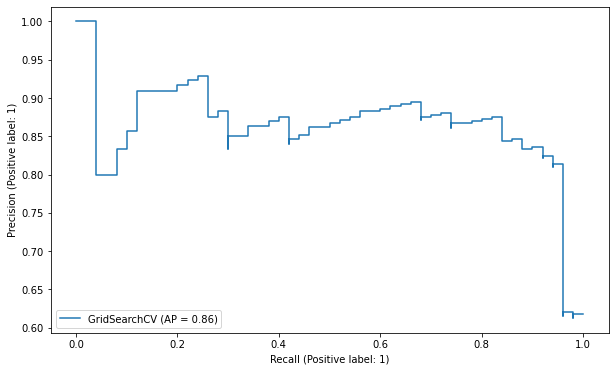

In [56]:
plot_precision_recall_curve(grid_model, X_test_scaled, y_test);

# Implement KNN and Evaluate

In [57]:
from sklearn.neighbors import KNeighborsClassifier

In [59]:
knn = KNeighborsClassifier()

In [60]:
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [61]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [62]:
knn_model.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [63]:
y_pred = knn_model.predict(X_test_scaled)
y_pred

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1], dtype=int64)

In [64]:
y_pred_proba = knn_model.predict_proba(X_test_scaled)

In [65]:
pd.DataFrame(y_pred_proba)

,0,1
0,0.800,0.200
1,0.600,0.400
2,0.000,1.000
3,1.000,0.000
4,0.000,1.000
...,...,...
86,1.000,0.000
87,0.200,0.800
88,0.200,0.800
89,0.800,0.200


In [66]:
my_dict = {"Actual": y_test, "Pred":y_pred, "Proba_1":y_pred_proba[:,1], "Proba_0":y_pred_proba[:,0]}

In [67]:
pd.DataFrame.from_dict(my_dict).sample(10)

,Actual,Pred,Proba_1,Proba_0
90,1,1,1.000,0.000
113,1,0,0.200,0.800
164,1,1,1.000,0.000
184,0,0,0.000,1.000
193,0,0,0.000,1.000
25,1,1,1.000,0.000
281,0,0,0.200,0.800
33,1,1,0.600,0.400
78,1,1,1.000,0.000
284,0,0,0.200,0.800


In [68]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [69]:
confusion_matrix(y_test, y_pred)

array([[34,  7],
       [10, 40]], dtype=int64)

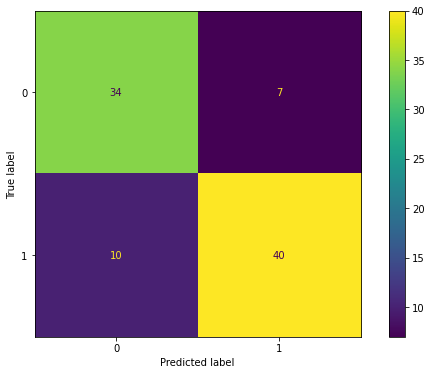

In [70]:
plot_confusion_matrix(knn_model, X_test_scaled, y_test);

In [71]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[34  7]
 [10 40]]
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        41
           1       0.85      0.80      0.82        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.82      0.81      0.81        91



In [72]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [73]:
test_error_rates = []


for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled,y_train) 
   
    y_pred_test = knn_model.predict(X_test_scaled)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

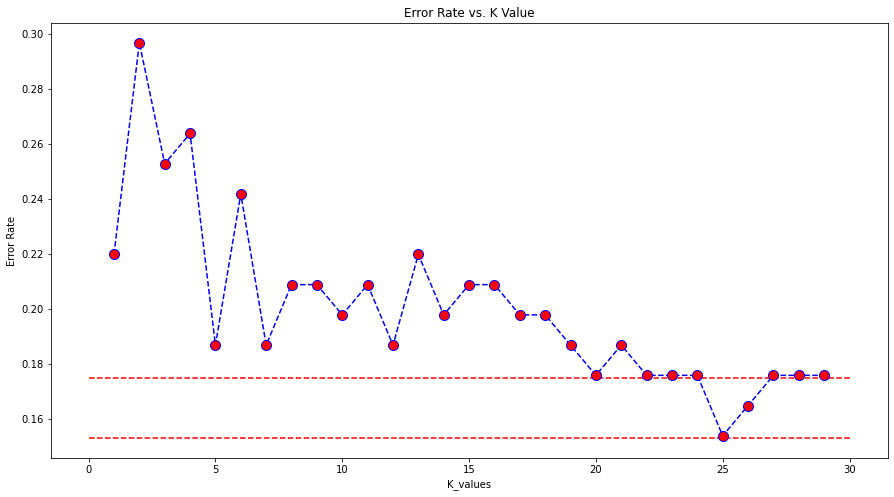

In [74]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.153, xmin = 0, xmax = 30, colors= 'r', linestyles="--")
plt.hlines(y=0.175, xmin = 0, xmax = 30, colors= 'r', linestyles="--")

In [75]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train_scaled,y_train)
print('WITH K=1\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=1

Test_Set
[[32  9]
 [11 39]]
              precision    recall  f1-score   support

           0       0.74      0.78      0.76        41
           1       0.81      0.78      0.80        50

    accuracy                           0.78        91
   macro avg       0.78      0.78      0.78        91
weighted avg       0.78      0.78      0.78        91


Train_Set
[[ 97   0]
 [  0 115]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        97
           1       1.00      1.00      1.00       115

    accuracy                           1.00       212
   macro avg       1.00      1.00      1.00       212
weighted avg       1.00      1.00      1.00       212



In [76]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train_scaled,y_train)
print('WITH K=5\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=5

Test_Set
[[34  7]
 [10 40]]
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        41
           1       0.85      0.80      0.82        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.82      0.81      0.81        91


Train_Set
[[ 82  15]
 [ 15 100]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        97
           1       0.87      0.87      0.87       115

    accuracy                           0.86       212
   macro avg       0.86      0.86      0.86       212
weighted avg       0.86      0.86      0.86       212



In [77]:
knn = KNeighborsClassifier(n_neighbors=12)

knn.fit(X_train_scaled,y_train)
print('WITH K=12\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=12

Test_Set
[[36  5]
 [12 38]]
              precision    recall  f1-score   support

           0       0.75      0.88      0.81        41
           1       0.88      0.76      0.82        50

    accuracy                           0.81        91
   macro avg       0.82      0.82      0.81        91
weighted avg       0.82      0.81      0.81        91


Train_Set
[[83 14]
 [20 95]]
              precision    recall  f1-score   support

           0       0.81      0.86      0.83        97
           1       0.87      0.83      0.85       115

    accuracy                           0.84       212
   macro avg       0.84      0.84      0.84       212
weighted avg       0.84      0.84      0.84       212



In [78]:
knn = KNeighborsClassifier(n_neighbors=22)

knn.fit(X_train_scaled,y_train)
print('WITH K=22\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=22

Test_Set
[[36  5]
 [11 39]]
              precision    recall  f1-score   support

           0       0.77      0.88      0.82        41
           1       0.89      0.78      0.83        50

    accuracy                           0.82        91
   macro avg       0.83      0.83      0.82        91
weighted avg       0.83      0.82      0.82        91


Train_Set
[[80 17]
 [16 99]]
              precision    recall  f1-score   support

           0       0.83      0.82      0.83        97
           1       0.85      0.86      0.86       115

    accuracy                           0.84       212
   macro avg       0.84      0.84      0.84       212
weighted avg       0.84      0.84      0.84       212



In [79]:
knn = KNeighborsClassifier(n_neighbors=25)

knn.fit(X_train_scaled,y_train)
print('WITH K=25\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=25

Test_Set
[[36  5]
 [ 9 41]]
              precision    recall  f1-score   support

           0       0.80      0.88      0.84        41
           1       0.89      0.82      0.85        50

    accuracy                           0.85        91
   macro avg       0.85      0.85      0.85        91
weighted avg       0.85      0.85      0.85        91


Train_Set
[[ 76  21]
 [ 15 100]]
              precision    recall  f1-score   support

           0       0.84      0.78      0.81        97
           1       0.83      0.87      0.85       115

    accuracy                           0.83       212
   macro avg       0.83      0.83      0.83       212
weighted avg       0.83      0.83      0.83       212



In [80]:
from sklearn.model_selection import cross_val_score, cross_validate

In [81]:
model = KNeighborsClassifier(n_neighbors=9)

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,0.003,0.014,0.864,0.846,0.917,0.880
2,0.002,0.010,0.864,0.846,0.917,0.880
3,0.001,0.005,0.762,0.818,0.750,0.783
4,0.002,0.010,0.762,0.818,0.750,0.783
5,0.001,0.006,0.714,0.688,0.917,0.786
6,0.001,0.011,0.762,0.800,0.727,0.762
7,0.001,0.010,0.810,0.769,0.909,0.833
8,0.002,0.010,0.905,0.846,1.000,0.917
9,0.001,0.008,0.762,0.875,0.636,0.737
10,0.001,0.011,0.810,0.818,0.818,0.818


In [82]:
df_scores.mean()[2:]

test_accuracy    0.801
test_precision   0.812
test_recall      0.834
test_f1          0.818
dtype: float64

In [83]:
from sklearn.model_selection import GridSearchCV

In [84]:
knn_grid = KNeighborsClassifier()

In [85]:
k_values= range(1,30)

In [86]:
param_grid = {"n_neighbors":k_values, "p": [1,2], "weights": ['uniform', "distance"]}

In [87]:
knn_grid_model = GridSearchCV(knn_grid, param_grid, cv=10, scoring= 'accuracy')

In [88]:
knn_grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 30), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [89]:
knn_grid_model.best_params_

{'n_neighbors': 10, 'p': 1, 'weights': 'distance'}

In [90]:
print('WITH K=10\n')
eval_metric(knn_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=10

Test_Set
[[34  7]
 [ 9 41]]
              precision    recall  f1-score   support

           0       0.79      0.83      0.81        41
           1       0.85      0.82      0.84        50

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91


Train_Set
[[ 97   0]
 [  0 115]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        97
           1       1.00      1.00      1.00       115

    accuracy                           1.00       212
   macro avg       1.00      1.00      1.00       212
weighted avg       1.00      1.00      1.00       212



In [91]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score, roc_curve

In [92]:
knn_model = KNeighborsClassifier(n_neighbors=18).fit(X_train_scaled, y_train)

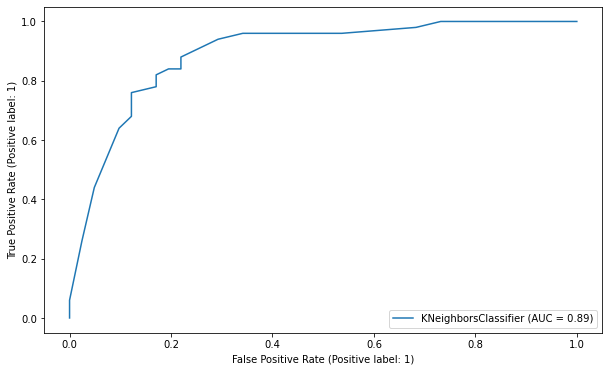

In [93]:
plot_roc_curve(knn_model, X_test_scaled, y_test)

In [94]:
y_pred_proba = knn_model.predict_proba(X_test_scaled)
roc_auc_score(y_test, y_pred_proba[:,1])

0.891951219512195

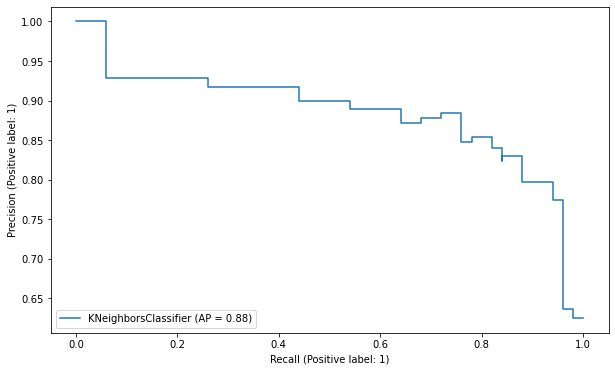

In [95]:
plot_precision_recall_curve(knn_model, X_test_scaled, y_test);

# Visually compare models based on your chosen metric

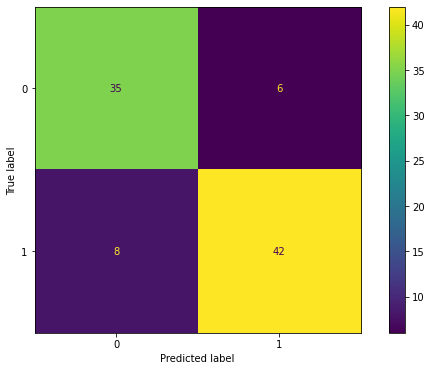

In [102]:
plot_confusion_matrix(log_model, X_test_scaled, y_test);

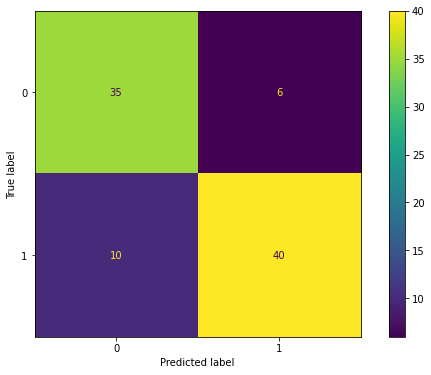

In [103]:
plot_confusion_matrix(grid_model, X_test_scaled, y_test);

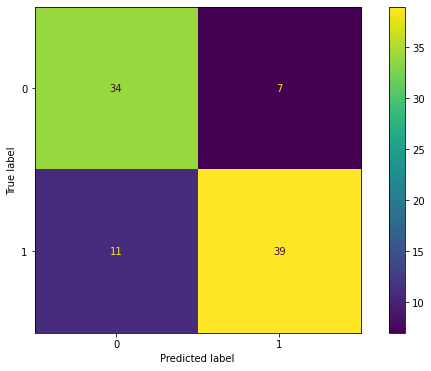

In [104]:
plot_confusion_matrix(knn_model, X_test_scaled, y_test);

# Chose best model and make a random prediction 

In [152]:
import pickle

In [153]:
scaler = StandardScaler()

In [154]:
scaler.fit(X)

StandardScaler()

In [155]:
pickle.dump(scaler, open('scaler_heart', 'wb'))

In [156]:
X_scaled = scaler.transform(X)

In [157]:
final_model = LogisticRegression(C= 0.42813323987193935, class_weight= None, penalty= 'l1',solver= 'saga').fit(X_scaled, y)

In [158]:
pickle.dump(final_model, open("final_model_heart", 'wb'))

In [159]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.000,54.366,9.082,29.000,47.500,55.000,61.000,77.000
sex,303.000,0.683,0.466,0.000,0.000,1.000,1.000,1.000
trestbps,303.000,131.624,17.538,94.000,120.000,130.000,140.000,200.000
chol,303.000,246.264,51.831,126.000,211.000,240.000,274.500,564.000
fbs,303.000,0.149,0.356,0.000,0.000,0.000,0.000,1.000
thalach,303.000,149.647,22.905,71.000,133.500,153.000,166.000,202.000
exang,303.000,0.327,0.470,0.000,0.000,0.000,1.000,1.000
oldpeak,303.000,1.040,1.161,0.000,0.000,0.800,1.600,6.200
ca,303.000,0.729,1.023,0.000,0.000,0.000,1.000,4.000
cp_atypical angina,303.000,0.165,0.372,0.000,0.000,0.000,0.000,1.000


In [160]:
my_dict = {'age': [15, 20 , 59],
           'sex': [0.0, 0.0, 0.0],
           'trestbps': [120, 131, 100],
           'chol': [130, 148, 500],
           'fbs': [0.0, 1.0, 0.0],
           'thalach': [80, 200, 98],
           'exang': [0.0,  0.0, 0.0],
           'oldpeak': [3.3, 4.5,  1.0],
           'ca' : [2.0, 1.0, 0.0],
           'cp_atypical angina': [1.0, 1.0, 0.0],
           'cp_non-anginal pain': [0.0, 0.0, 1.0],
           'cp_typical angina': [0.0, 1.0, 0.0],
           'restecg_left ventricular hypertrophy': [1.0, 0.0, 0.0],
           'restecg_normal': [0.0, 1.0, 1.0],
           'slope_flat': [1.0,  0.0, 1.0],
           'slope_upsloping': [0.0, 0.0, 0.0],
           'thal_1': [0.0, 0.0,  1.0],
           'thal_2': [1.0, 0.0,  0.0],
           'thal_normal': [0.0, 1.0,  0.0]}
           

In [161]:
sample = pd.DataFrame(my_dict)
sample

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_atypical angina,cp_non-anginal pain,cp_typical angina,restecg_left ventricular hypertrophy,restecg_normal,slope_flat,slope_upsloping,thal_1,thal_2,thal_normal
0,15,0.000,120,130,0.000,80,0.000,3.300,2.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000
1,20,0.000,131,148,1.000,200,0.000,4.500,1.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000
2,59,0.000,100,500,0.000,98,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,1.000,0.000,1.000,0.000,0.000


In [162]:
scaler_hearts = pickle.load(open("scaler_heart", "rb"))

In [163]:
sample_scaled = scaler_hearts.transform(sample)
sample_scaled

array([[-4.34166707, -1.46841752, -0.66386682, -2.24685838, -0.41763453,
        -3.04569256, -0.69663055,  1.95003362,  1.24459328,  2.24944438,
        -0.63464776, -0.94538352,  8.64580823, -0.97072534,  1.06480177,
        -0.92676626, -0.25131234,  0.9084609 , -0.79311554],
       [-3.79022294, -1.46841752, -0.03562488, -1.8989997 ,  2.394438  ,
         2.20196803, -0.69663055,  2.98526828,  0.26508221,  2.24944438,
        -0.63464776,  1.05777177, -0.11566299,  1.03015751, -0.93914194,
        -0.92676626, -0.25131234, -1.10076284,  1.26085034],
       [ 0.5110413 , -1.46841752, -1.80612489,  4.90357007, -0.41763453,
        -2.25854347, -0.69663055, -0.03416616, -0.71442887, -0.44455422,
         1.57567719, -0.94538352, -0.11566299,  1.03015751,  1.06480177,
        -0.92676626,  3.97911213, -1.10076284, -0.79311554]])

In [164]:
final_model = pickle.load(open("final_model_heart", "rb"))

In [166]:
predictions = final_model.predict(sample_scaled)
predictions_proba = final_model.predict_proba(sample_scaled)

In [169]:
sample["pred_proba"] = predictions_proba[:,1]
sample["pred_proba_1"] = predictions_proba[:,1]
sample["pred_proba_0"] = predictions_proba[:,0]
sample

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_atypical angina,...,restecg_left ventricular hypertrophy,restecg_normal,slope_flat,slope_upsloping,thal_1,thal_2,thal_normal,pred_proba,pred_proba_1,pred_proba_0
0,15,0.000,120,130,0.000,80,0.000,3.300,2.000,1.000,...,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.579,0.579,0.421
1,20,0.000,131,148,1.000,200,0.000,4.500,1.000,1.000,...,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.220,0.220,0.780
2,59,0.000,100,500,0.000,98,0.000,1.000,0.000,0.000,...,0.000,1.000,1.000,0.000,1.000,0.000,0.000,0.862,0.862,0.138
